# Import files

In [1]:
# Import classic and useful libraries
import pandas as pd 
import numpy as np 
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/Thomas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Basic text processing

In [2]:
# With text data we often work with lists at first

In [3]:
import re
import json

In [4]:
# Function rto read jl file
file_name = "ReviewRestoSpider_10pages.jl"
def read_jl_file(file_name):
    values = []
    with open(file_name, 'rb') as f:
        line = '---'
        while len(line)>1:
            line = f.readline()
            values.append(line)
    values = values[:-1]
    values = [json.loads(i) for i in values]
    df = pd.DataFrame(values)
    return df
# Reading file
df = read_jl_file(file_name)
df.head()

,Rating,Restaurant_name,name,partial content,title
0,[5 of 5 bubbles],[ Karahi Junction ],tracey h,I have been using this restaurant for years. T...,"Best authentic Food, Chefs are top quality"
1,[5 of 5 bubbles],[ Melucci's ],kazowen,"The most amazing breakfast, ingredients fresh ...",Breakfast Bliss
2,[5 of 5 bubbles],[ Melucci's ],elthamfams,We went with friends ( 2 couples). The food he...,Excellent Food
3,[4 of 5 bubbles],[ Awesome Thai ],richardcC3581NV,So why not five stars? Everything was was very...,"Friendly staff, good food, good portions"
4,[5 of 5 bubbles],[ Namaste Gurkha ],leona939,"Great food, friendly staff, decent prices. I h...",Great food


In [5]:
corpus = df['partial content'].tolist()
corpus[:4]

['I have been using this restaurant for years. The chefs are excellent, there are always good portions and the food is always fresh, you can see them cooking behind the glass, the atmosphere is always friendly with mixed types of diners, children are always welcomed too.',
 "The most amazing breakfast, ingredients fresh and cooked to perfection with expertise and passion. The staff are so friendly and attentive you're made to feel like you've come home. Cannot wait to return (maybe tomorrow)",
 'We went with friends ( 2 couples). The food here is excellent, staff are great. Family run business. You bring your own booze, so this keeps the cost down. I would say the food was one of the best i have eaten when eating out.',
 'So why not five stars? Everything was was very pleasant in this busy and popular Thai restaurant. The staff managed to fit us in (book!) and were very efficient in bringing out our dishes, albeit not at the same time. ']

## To Lower

In [6]:
# Changing all characters to lower case. A machine makes a difference between p and P.
corpus_l = [review.lower() for review in corpus]
corpus_l[:4]

['i have been using this restaurant for years. the chefs are excellent, there are always good portions and the food is always fresh, you can see them cooking behind the glass, the atmosphere is always friendly with mixed types of diners, children are always welcomed too.',
 "the most amazing breakfast, ingredients fresh and cooked to perfection with expertise and passion. the staff are so friendly and attentive you're made to feel like you've come home. cannot wait to return (maybe tomorrow)",
 'we went with friends ( 2 couples). the food here is excellent, staff are great. family run business. you bring your own booze, so this keeps the cost down. i would say the food was one of the best i have eaten when eating out.',
 'so why not five stars? everything was was very pleasant in this busy and popular thai restaurant. the staff managed to fit us in (book!) and were very efficient in bringing out our dishes, albeit not at the same time. ']

## Removing ponctuation
* The corpus needs some transformations, including changing letters to lower case, removing punctuation/numbers and special characters, etc.
* In Python, we use various NLP libraries such as NLTK, Spacy, Scikit-Learn, Gensim etc…

In [7]:
# In most of the case punctuation do not help on understanding a sentence or a doc
characters_to_remove = ["@", "/", "#", ".", ",", "!", "?", "(", ")", "-", "_","’","'", "\"", ":"]
transformation_dict = {initial:"" for initial in characters_to_remove}
no_punctuation_corpus = [review.translate(str.maketrans(transformation_dict)) for review in corpus_l]
no_punctuation_corpus[:4]

['i have been using this restaurant for years the chefs are excellent there are always good portions and the food is always fresh you can see them cooking behind the glass the atmosphere is always friendly with mixed types of diners children are always welcomed too',
 'the most amazing breakfast ingredients fresh and cooked to perfection with expertise and passion the staff are so friendly and attentive youre made to feel like youve come home cannot wait to return maybe tomorrow',
 'we went with friends  2 couples the food here is excellent staff are great family run business you bring your own booze so this keeps the cost down i would say the food was one of the best i have eaten when eating out',
 'so why not five stars everything was was very pleasant in this busy and popular thai restaurant the staff managed to fit us in book and were very efficient in bringing out our dishes albeit not at the same time ']

## Removing accents
* Some additional processing (removal of accents for instance) can be done on texts depending on the language
* One can also apply those transformations to change punctuations into words eg: ‘#’ = ‘hashtag’


In [8]:
# Very useful for some languages such as French
with_accent = ['é', 'è', 'à']
without_accent = ['e', 'e', 'a']
transformation_dict = {before:after for before, after in zip(with_accent, without_accent)}
no_accent_corpus = [review.translate(str.maketrans(transformation_dict)) for review in no_punctuation_corpus]
no_accent_corpus[:4]

['i have been using this restaurant for years the chefs are excellent there are always good portions and the food is always fresh you can see them cooking behind the glass the atmosphere is always friendly with mixed types of diners children are always welcomed too',
 'the most amazing breakfast ingredients fresh and cooked to perfection with expertise and passion the staff are so friendly and attentive youre made to feel like youve come home cannot wait to return maybe tomorrow',
 'we went with friends  2 couples the food here is excellent staff are great family run business you bring your own booze so this keeps the cost down i would say the food was one of the best i have eaten when eating out',
 'so why not five stars everything was was very pleasant in this busy and popular thai restaurant the staff managed to fit us in book and were very efficient in bringing out our dishes albeit not at the same time ']

## Removing specific characters

In [9]:
clean_corpus = [review.replace("\n", "") for review in no_accent_corpus]
clean_corpus[:4]

['i have been using this restaurant for years the chefs are excellent there are always good portions and the food is always fresh you can see them cooking behind the glass the atmosphere is always friendly with mixed types of diners children are always welcomed too',
 'the most amazing breakfast ingredients fresh and cooked to perfection with expertise and passion the staff are so friendly and attentive youre made to feel like youve come home cannot wait to return maybe tomorrow',
 'we went with friends  2 couples the food here is excellent staff are great family run business you bring your own booze so this keeps the cost down i would say the food was one of the best i have eaten when eating out',
 'so why not five stars everything was was very pleasant in this busy and popular thai restaurant the staff managed to fit us in book and were very efficient in bringing out our dishes albeit not at the same time ']

## Tokenization

In [10]:
# Using split (re)
tokenized_corpus_re = [re.split('\s+', review) for review in clean_corpus]
print(tokenized_corpus_re[0])

#`split` splits a segment on a specified delimiter
# nltk splits semantically, e.g. it will separate words from punctuation

['i', 'have', 'been', 'using', 'this', 'restaurant', 'for', 'years', 'the', 'chefs', 'are', 'excellent', 'there', 'are', 'always', 'good', 'portions', 'and', 'the', 'food', 'is', 'always', 'fresh', 'you', 'can', 'see', 'them', 'cooking', 'behind', 'the', 'glass', 'the', 'atmosphere', 'is', 'always', 'friendly', 'with', 'mixed', 'types', 'of', 'diners', 'children', 'are', 'always', 'welcomed', 'too']


In [11]:
# using NLP libraries (nltk)
tokenized_corpus_nltk = [nltk.word_tokenize(review) for review in clean_corpus]
print(tokenized_corpus_nltk[0])

['i', 'have', 'been', 'using', 'this', 'restaurant', 'for', 'years', 'the', 'chefs', 'are', 'excellent', 'there', 'are', 'always', 'good', 'portions', 'and', 'the', 'food', 'is', 'always', 'fresh', 'you', 'can', 'see', 'them', 'cooking', 'behind', 'the', 'glass', 'the', 'atmosphere', 'is', 'always', 'friendly', 'with', 'mixed', 'types', 'of', 'diners', 'children', 'are', 'always', 'welcomed', 'too']


In [12]:
tokenized_corpus_nltk[0][2]

'been'

In [13]:
from nltk.tokenize import TweetTokenizer
new_tokenizer = TweetTokenizer()
tokenized_corpus_tt = [new_tokenizer.tokenize(review) for review in clean_corpus]
print(tokenized_corpus_tt[0])

['i', 'have', 'been', 'using', 'this', 'restaurant', 'for', 'years', 'the', 'chefs', 'are', 'excellent', 'there', 'are', 'always', 'good', 'portions', 'and', 'the', 'food', 'is', 'always', 'fresh', 'you', 'can', 'see', 'them', 'cooking', 'behind', 'the', 'glass', 'the', 'atmosphere', 'is', 'always', 'friendly', 'with', 'mixed', 'types', 'of', 'diners', 'children', 'are', 'always', 'welcomed', 'too']


## Removing stop words
* Stopwords make the text look heavier without bringing in meaning
* Removing stop words reduces the dimensionality of term space
* The most common words in text documents are articles, prepositions, and pro-nouns, etc. that does not bring meaning to the documents


In [14]:
# Stop words are generally the most common words in a language 
from stop_words import get_stop_words
import random
stop_words = get_stop_words('en')
random.sample(stop_words, 5)

['against', 'of', 'do', 'more', 'ought']

In [15]:
tokenized_corpus_tt = [token for token in tokenized_corpus_tt if token not in stop_words] 

# Lemmatization

In [16]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer() 

lematized_corpus = [[lemmatizer.lemmatize(word) for word in tokenized_corpus_tt[i]] for i in range(len(tokenized_corpus_tt))]

lematized_corpus[0][0:10]

['i',
 'have',
 'been',
 'using',
 'this',
 'restaurant',
 'for',
 'year',
 'the',
 'chef']

# TF-IDF

### TF

In [17]:
def TF(lematized_corpus):
    count = 0
    numOfWords = {}
    for list_lem in lematized_corpus:
        for word in list_lem:
            count = count + 1
            if word in numOfWords:
                numOfWords[word] = numOfWords[word] + 1
            else:
                numOfWords[word] = 1
    Tf_dict = {}
    for word in numOfWords:
        Tf_dict[word] = numOfWords[word]/count
    return Tf_dict

TF = TF(lematized_corpus)

In [18]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

take(10, TF.items())

[('i', 0.012957686532754809),
 ('have', 0.005734012744877812),
 ('been', 0.0030561696794864216),
 ('using', 8.867030017852287e-05),
 ('this', 0.008423678516959673),
 ('restaurant', 0.007389191681543572),
 ('for', 0.014287741035432651),
 ('year', 0.0015192178097253586),
 ('the', 0.051411040043507564),
 ('chef', 0.0005320218010711372)]

### TF-IDF

In [19]:
wordfreq = {}
for sentence in lematized_corpus:
    tokens = sentence
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

import heapq
most_freq = heapq.nlargest(1000, wordfreq, key=wordfreq.get)

In [20]:
word_idf_values = {}
for token in most_freq:
    doc_containing_word = 0
    for document in lematized_corpus:
        if token in document:
            doc_containing_word += 1
    word_idf_values[token] = np.log(len(lematized_corpus)/(1 + doc_containing_word))

In [21]:
word_tf_values = {}
for token in most_freq:
    sent_tf_vector = []
    for document in lematized_corpus:
        doc_freq = 0
        for word in document:
            if token == word:
                  doc_freq += 1
        word_tf = doc_freq/len(document)
        sent_tf_vector.append(word_tf)
    word_tf_values[token] = sent_tf_vector

In [22]:
tfidf_values = {}
for token in word_tf_values.keys():
    tfidf_sentences = []
    for tf_sentence in word_tf_values[token]:
        tf_idf_score = tf_sentence * word_idf_values[token]
        tfidf_sentences.append(tf_idf_score)
    tfidf_values[token] = tfidf_sentences

In [23]:
sample = take(20, tfidf_values.items())
tf_idf_model = np.asarray(sample)
# tf_idf_model

# TFIDF Plot

In [26]:
plot_tfidf = {}
for key in tfidf_values:
    list_key = tfidf_values[key]
    plot_tfidf[key] = sum(list_key)/len(list_key)

take(10, plot_tfidf.items())

[('the', 0.013873335869608094),
 ('and', 0.009411582942226842),
 ('a', 0.012880546368779675),
 ('wa', 0.014703286666293771),
 ('to', 0.012545008660322352),
 ('we', 0.013795199545606604),
 ('food', 0.011283410202797862),
 ('for', 0.011788209617646045),
 ('of', 0.011234908541481571),
 ('i', 0.012819988812821604)]

In [27]:
word = list(plot_tfidf.keys())
avg = list(plot_tfidf.values())
df_plot = pd.DataFrame({'word': word, 'avg' : avg})
df_plot.head()

,word,avg
0,the,0.013873
1,and,0.009412
2,a,0.012881
3,wa,0.014703
4,to,0.012545


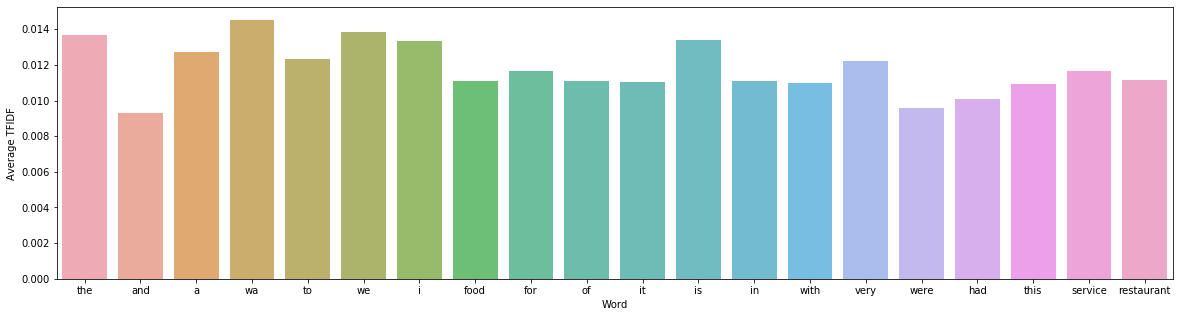

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,5))
ax = sns.barplot(x = 'word',y = "avg",data = df_plot,alpha=0.8)
ax.set(xlabel='Word',ylabel='Average TFIDF') # over sample of 20 words
plt.show()

# WordCloud

In [31]:
text = " ".join(review for review in df["partial content"])
print("There are {} words in the combination of all reviews.".format(len(text)))

There are 948831 words in the combination of all reviews.


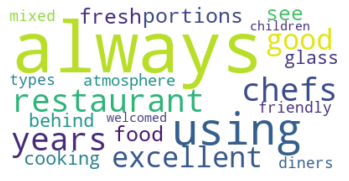

In [30]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

%matplotlib inline
text = df["partial content"][0]

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

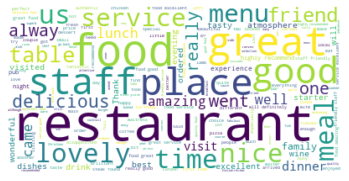

In [32]:
# Create stopwords list to remove from word cloud:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image (the matplotlib way)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()